# My first notebook


In [21]:
print("Hello world")

Hello world


In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
# fetch and load data
def load_housing_data():
    tarball_path=Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing=load_housing_data()

In [24]:
#top 5
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [27]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


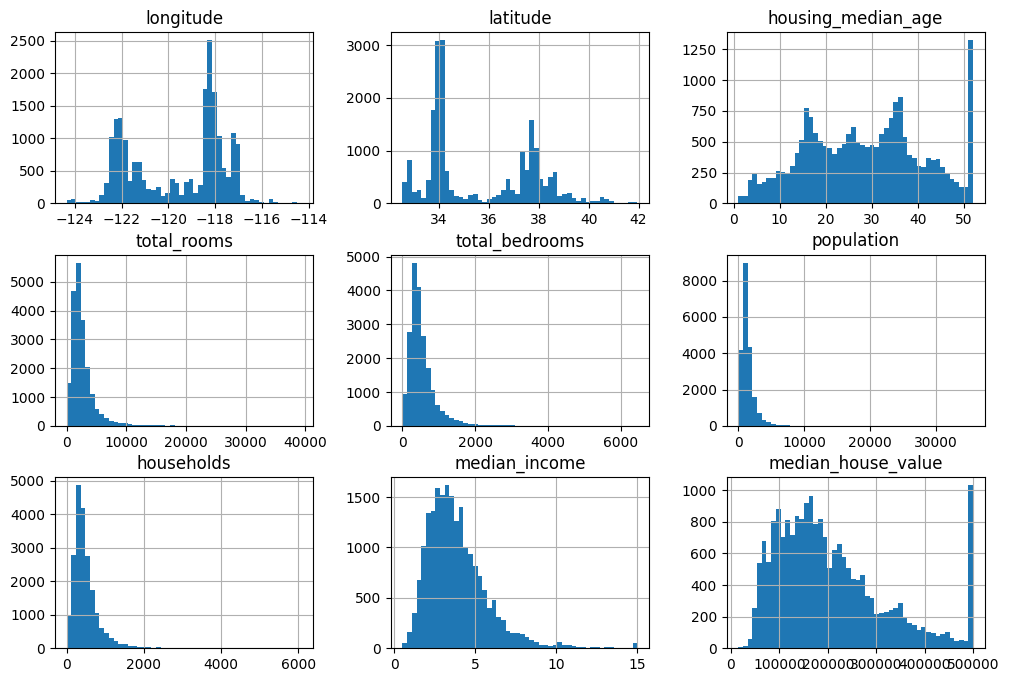

In [28]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [29]:
#creating test set
# def shuffle_and_split_data(data,test_ratio):
#     shuffled_indices=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled_indices[:test_set_size]
#     train_indices=shuffled_indices[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]
def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32

    

In [30]:
# def split_data_with_id_hash(data,test_ratio,id_column):
#     ids=data[id_column]
#     in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
#     return data.loc[~in_test_set],data.loc[in_test_set]

# housing_with_id=housing.reset_index()
# train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"index")

In [4]:
#scikit-learn split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [32]:
len(test_set)

4128

In [33]:
#len(train_set)

In [34]:
housing=train_set.copy()

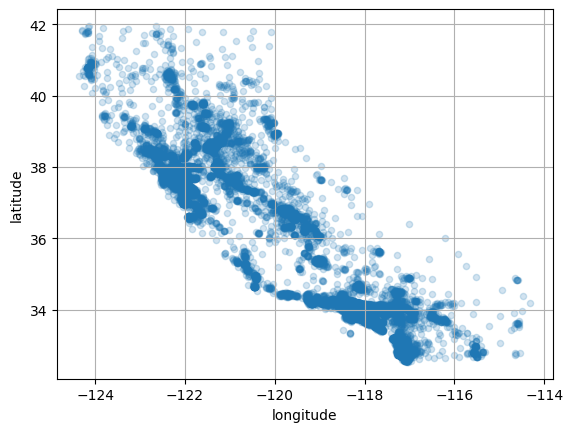

In [7]:
#a better visualization that highlights high density areas
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

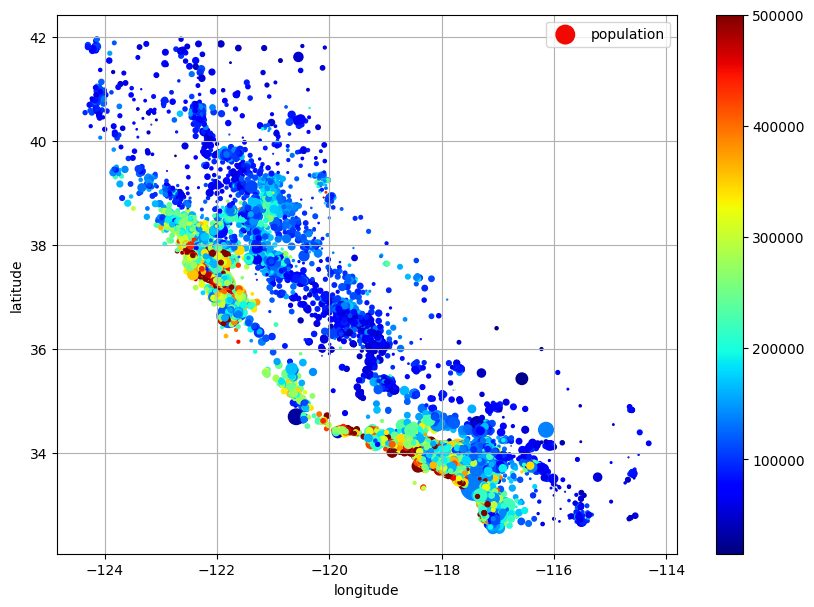

In [8]:
#visual representation of housing prices.blue=>low prices,red=>high prices.big circle=>larger population
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,
             s=housing["population"]/100,label="population",
             c=housing["median_house_value"],cmap="jet",colorbar=True,
             legend=True,sharex=False,figsize=(10,7))
plt.show()

In [37]:
corr_matrix=housing.corr(numeric_only=True)

In [38]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

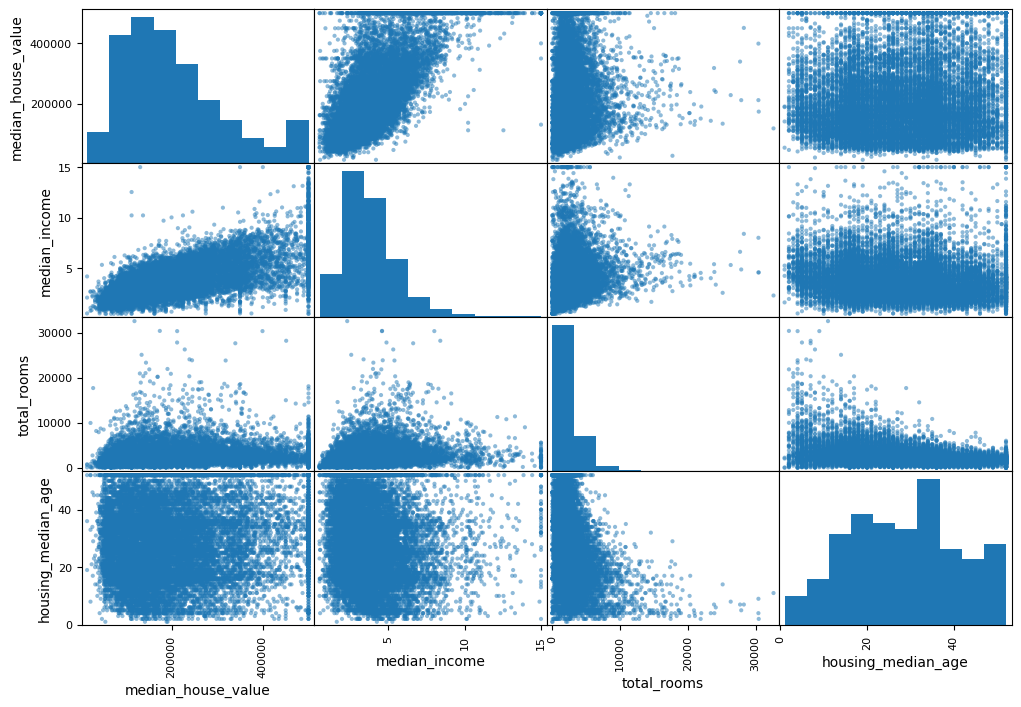

In [39]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

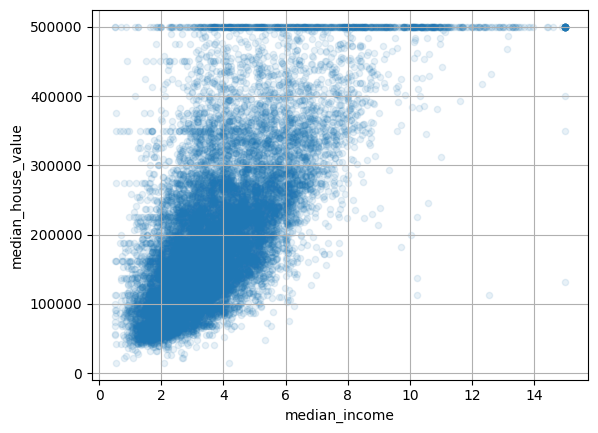

In [40]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)
plt.show()

In [41]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [42]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
rooms_per_house       0.146940
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
people_per_house     -0.021577
population           -0.025820
longitude            -0.043603
latitude             -0.146324
bedrooms_ratio       -0.254817
Name: median_house_value, dtype: float64

# Separate features from target/label.housing=>X and housing_labels=Y

In [5]:

housing=train_set.drop("median_house_value",axis=1)
housing_labels=train_set["median_house_value"].copy()

# Handling missing values


In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median") #it'll store the median value of each feature
housing_num=housing.select_dtypes(include=[np.number]) #create a copy of the data with numerical values
imputer.fit(housing_num) #fit the imputer instance to the training data

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16900000e+03,  4.11000000e+02,  3.52460000e+00,
        1.79200000e+05,  5.23242240e+00,  2.03058929e-01,  2.81956622e+00])

In [45]:
housing_num.median().values

array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16900000e+03,  4.11000000e+02,  3.52460000e+00,
        1.79200000e+05,  5.23242240e+00,  2.03058929e-01,  2.81956622e+00])

In [7]:
#replacing missing values with learned median:
X=imputer.transform(housing_num) #imputer.transform(housing_num) is a NumPy array.so,X has neither column nor index

In [ ]:
#recover column names and index from housing_num:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)


# Handling text and categorical attributes

In [9]:
housing_cat=housing["ocean_proximity"]
housing_cat.head(8)

14196    NEAR OCEAN
8267     NEAR OCEAN
17445      NEAR BAY
14265     <1H OCEAN
2271         INLAND
17848      NEAR BAY
6252         INLAND
9389      <1H OCEAN
Name: ocean_proximity, dtype: object

In [10]:
#convert these categories from text to number
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat.to_frame())

In [53]:
housing_cat_encoded[:8]

array([[4.],
       [4.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.]])

In [54]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# one hot encoding


In [11]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat.to_frame())

In [12]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [59]:
#another approach:
df_test=pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [ ]:
cat_encoder.transform(df_test).toarray() #transform get_dummies into onehotencoding

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
#for unknown category:
df_test_unknown=pd.DataFrame({"ocean_proximity":["<2H OCEAN","ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
cat_encoder.handle_unknown="ignore"
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [71]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [72]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [74]:
df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                       columns=cat_encoder.get_feature_names_out(),
                       index=df_test_unknown.index)

# min-max scaling/Normalization


In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

# Standardization


In [14]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)

In [16]:
from sklearn.linear_model import LinearRegression
target_scaler=StandardScaler()
scaled_labels=target_scaler.fit_transform(housing_labels.to_frame())
model=LinearRegression()
model.fit(housing[["median_income"]],scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5]
scaled_prediction=model.predict(some_new_data)
predictions=target_scaler.inverse_transform(scaled_prediction)

In [17]:
from sklearn.compose import TransformedTargetRegressor
model=TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[["median_income"]],housing_labels)
predictions=model.predict(some_new_data)

# Transformation pipelines


In [18]:
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standardize",StandardScaler()),
])

In [19]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[ 1.17, -1.35,  0.43,  1.57,  1.38,  1.08,  1.51,  0.38],
       [ 1.27, -1.38, -1.47, -0.81, -0.9 , -0.64, -0.88,  0.42]])

In [20]:
#recover dataframe:
df_housing_num_prepared=pd.DataFrame(
    housing_num_prepared,columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)

In [25]:
#single transformer capable of handling all columns:
from sklearn.compose import ColumnTransformer
num_attributes=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
cat_attributes=["ocean_proximity"]

cat_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("1hotencoder",OneHotEncoder(handle_unknown="ignore")),
])

preprocessing=ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",cat_pipeline,cat_attributes)
])

In [27]:
#update of previous code:   make_column_selector() automatically select all the features of a given type and make_column_transformer() chooses name for me
from sklearn.compose import make_column_selector,make_column_transformer
preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include=object)),
)


In [28]:
#applying the columnTransformer to the housing data:
housing_prepared=preprocessing.fit_transform(housing)